### Mô hình Black-Scholes và Mô phỏng Chuyển động Brown Hình học (GBM)



In [2]:
# import thư viện
import sys

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Thêm thư mục gốc của dự án vào sys.path để import các module tùy chỉnh
if ".." not in sys.path:
    sys.path.append("..")

from core.black_scholes import european_call_price, european_put_price
from core.gbm_simulator import simulate_gbm_paths

sns.set_theme(style="whitegrid", palette="pastel")

## I. Mô hình Định giá Quyền chọn Black-Scholes

Mô hình Black-Scholes cung cấp giá trị lý thuyết cho quyền chọn kiểu châu Âu, dựa trên một số giả định nhất định.

### 1. Các tham số đầu vào:

*   `S`: Giá hiện tại của tài sản cơ sở (Current price of the underlying asset).
*   `K`: Giá thực hiện của quyền chọn (Strike price).
*   `T`: Thời gian còn lại đến ngày đáo hạn (Time to maturity, tính bằng **năm**).
*   `r`: Lãi suất phi rủi ro hàng năm, tínhทบ lãi liên tục (Annual risk-free interest rate, continuously compounded).
*   `σ` (sigma): Độ biến động (volatility) của tỷ suất sinh lợi tài sản cơ sở (hàng năm).

### 2. Các thành phần trung gian `d1` và `d2`:

Công thức tính `d1` và `d2` là:

$d_1 = \frac{\ln(S/K) + (r + \frac{\sigma^2}{2}) \cdot T}{\sigma \cdot \sqrt{T}}$

$d_2 = d_1 - \sigma \cdot \sqrt{T}$

### 3. Công thức tính giá quyền chọn:

**Giá Quyền chọn Mua (Call Option Price - C):**

$C = S \cdot N(d_1) - K \cdot e^{-rT} \cdot N(d_2)$

**Giá Quyền chọn Bán (Put Option Price - P):**

$P = K \cdot e^{-rT} \cdot N(-d_2) - S \cdot N(-d_1)$

Trong đó:
*   $N(x)$: Là hàm phân phối chuẩn tích lũy (Cumulative Normal Distribution function - CDF), cho biết xác suất để một biến ngẫu nhiên chuẩn có giá trị nhỏ hơn hoặc bằng $x$.
*   $e$: Là cơ số của logarit tự nhiên.

In [3]:
# Định nghĩa các tham số đầu vào cho ví dụ Black-Scholes
current_asset_price = 100.0  # S
strike_price = 100.0  # K
time_to_maturity_years = 1.0  # T (1 năm)
risk_free_rate_annual = 0.05  # r (5%)
volatility_annual = 0.20  # sigma (20%)

# Tính toán giá quyền chọn Call và Put
call_option_price = european_call_price(
    current_asset_price,
    strike_price,
    time_to_maturity_years,
    risk_free_rate_annual,
    volatility_annual,
)

put_option_price = european_put_price(
    current_asset_price,
    strike_price,
    time_to_maturity_years,
    risk_free_rate_annual,
    volatility_annual,
)

# In kết quả tính toán
print("Giá trị Quyền chọn Mua (Call) tính theo Black-Scholes:")
print(round(call_option_price, 4))  # Làm tròn đến 4 chữ số thập phân

print("\nGiá trị Quyền chọn Bán (Put) tính theo Black-Scholes:")
print(round(put_option_price, 4))

Giá trị Quyền chọn Mua (Call) tính theo Black-Scholes:
10.4506

Giá trị Quyền chọn Bán (Put) tính theo Black-Scholes:
5.5735


### Giải thích các biến và kết quả của ví dụ Black-Scholes:

*   `current_asset_price`: Tương ứng với $S$.
*   `strike_price`: Tương ứng với $K$.
*   `time_to_maturity_years`: Tương ứng với $T$.
*   `risk_free_rate_annual`: Tương ứng với $r$.
*   `volatility_annual`: Tương ứng với $\sigma$.

Các hàm `european_call_price` và `european_put_price` (từ module `core.black_scholes`) đã được sử dụng để tính giá.

## II. Mô phỏng Giá Tài sản với Chuyển động Brown Hình học (GBM)

Chuyển động Brown Hình học (GBM) là một mô hình toán học dùng để mô tả sự biến động ngẫu nhiên của giá tài sản theo thời gian. Đây là một giả định quan trọng của mô hình Black-Scholes.

### 1. Công thức rời rạc hóa GBM:

Để mô phỏng giá $S_t$ tại một bước thời gian $t$, dựa trên giá $S_{t-\Delta t}$ tại bước trước đó:

$S_t = S_{t-\Delta t} \cdot \exp\left( \left(\mu - \frac{\sigma^2}{2}\right) \Delta t + \sigma \cdot Z \cdot \sqrt{\Delta t} \right)$

Trong đó:
*   $S_0$: Giá tài sản ban đầu.
*   $\mu$ (mu): Tỷ suất sinh lợi kỳ vọng hàng năm của tài sản (drift rate). Trong định giá phi rủi ro (risk-neutral), thường lấy $\mu = r$.
*   $\sigma$ (sigma): Độ biến động hàng năm của tài sản (giống $\sigma$ trong Black-Scholes).
*   $\Delta t$ (delta t): Độ dài của mỗi bước thời gian mô phỏng (ví dụ, $1/252$ cho ngày).
*   $Z$: Một biến ngẫu nhiên được rút từ phân phối chuẩn chuẩn hóa ($Z \sim N(0,1)$).
*   $\exp(\cdot)$: Hàm mũ cơ số $e$.

### 2. Mục đích mô phỏng:
Mô phỏng GBM giúp chúng ta tạo ra nhiều kịch bản giá có thể xảy ra trong tương lai, phục vụ cho việc phân tích rủi ro, kiểm tra chiến lược, và hiểu rõ hơn về hành vi của các công cụ phái sinh.

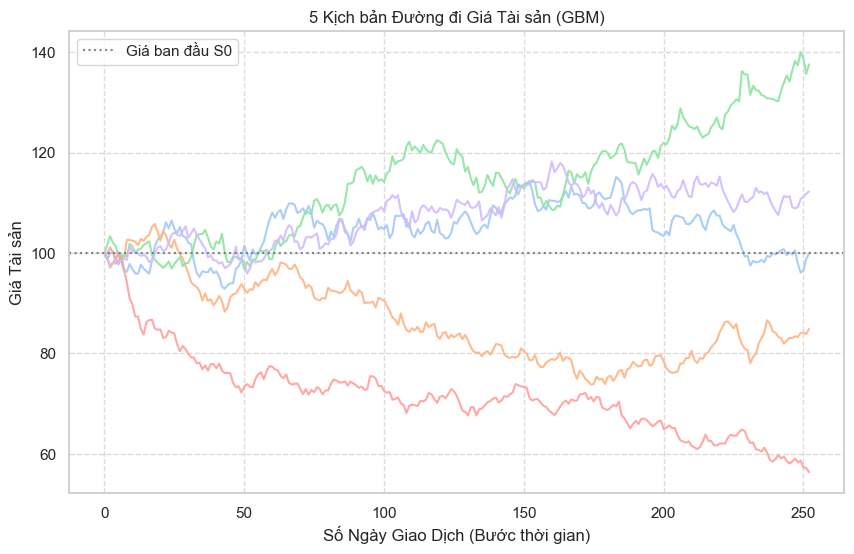

In [4]:
# Tham số cho mô phỏng GBM
initial_asset_price_s0 = 100.0  # S0
expected_annual_return_mu = 0.05  # mu (giả sử bằng lãi suất r)
annual_volatility_sigma = 0.20  # sigma (cùng sigma như BS)
simulation_horizon_T = 1.0  # T (tổng thời gian mô phỏng, ví dụ 1 năm)
time_step_dt = 1.0 / 252.0  # dt (bước thời gian hàng ngày)
number_of_paths_to_simulate = 5  # Số lượng đường giá mô phỏng (ít để vẽ rõ)
gbm_random_seed = 123  # Random seed để kết quả có thể tái lập

# Chạy hàm mô phỏng GBM
simulated_gbm_price_paths = simulate_gbm_paths(
    S0=initial_asset_price_s0,
    mu=expected_annual_return_mu,
    sigma=annual_volatility_sigma,
    T=simulation_horizon_T,
    dt=time_step_dt,
    num_paths=number_of_paths_to_simulate,
    random_seed=gbm_random_seed,
)

# Trực quan hóa các đường giá GBM đã mô phỏng
plt.figure(figsize=(10, 6))  # Thiết lập kích thước biểu đồ

# Lấy số bước từ mảng kết quả (số cột - 1 vì cột 0 là S0)
num_time_steps_plot = simulated_gbm_price_paths.shape[1] - 1
# Tạo mảng các bước thời gian để làm trục x (từ 0 đến num_time_steps_plot)
time_axis_plot = np.arange(num_time_steps_plot + 1)


for i in range(number_of_paths_to_simulate):
    plt.plot(time_axis_plot, simulated_gbm_price_paths[i, :], lw=1.5, alpha=0.9)

plt.title(str(number_of_paths_to_simulate) + " Kịch bản Đường đi Giá Tài sản (GBM)")
plt.xlabel("Số Ngày Giao Dịch (Bước thời gian)")
plt.ylabel("Giá Tài sản")
plt.grid(True, linestyle="--", alpha=0.7)
plt.axhline(initial_asset_price_s0, color="grey", linestyle=":", lw=1.5, label="Giá ban đầu S0")
plt.legend()
plt.show()

### Giải thích các biến và biểu đồ GBM:

Trong ô mô phỏng GBM ở trên:
*   `initial_asset_price_s0`: Tương ứng với $S_0$.
*   `expected_annual_return_mu`: Tương ứng với $\mu$.
*   `annual_volatility_sigma`: Tương ứng với $\sigma$.
*   `simulation_horizon_T`: Tổng thời gian $T$ của quá trình mô phỏng.
*   `time_step_dt`: Bước thời gian $\Delta t$.
*   `number_of_paths_to_simulate`: Số kịch bản đường giá riêng biệt được tạo ra.
*   `gbm_random_seed`: Giá trị hạt giống cho trình tạo số ngẫu nhiên. Việc đặt seed giúp kết quả mô phỏng giống hệt nhau mỗi khi chạy lại notebook, rất hữu ích cho việc debug và chia sẻ kết quả.

**Biểu đồ:**
Biểu đồ hiển thị các đường giá khác nhau mà tài sản có thể đi theo dựa trên mô hình GBM. Mỗi đường là một "kịch bản" (path) riêng.
*   Trục hoành (x-axis): Số ngày giao dịch (hoặc số bước thời gian) đã trôi qua.
*   Trục tung (y-axis): Giá của tài sản.
*   Đường chấm ngang màu xám: Mức giá ban đầu $S_0$.

Bạn có thể thay đổi `number_of_paths_to_simulate` (ví dụ lên 100 hoặc 1000) và `gbm_random_seed` (hoặc xóa nó đi để mỗi lần chạy là ngẫu nhiên khác nhau) để xem các tập hợp đường giá khác.